In [ ]:
from csv import DictReader
from csv import DictWriter
from csv import  writer
import pandas as pd

# **bold text**<h1>Labelling data according to WHO

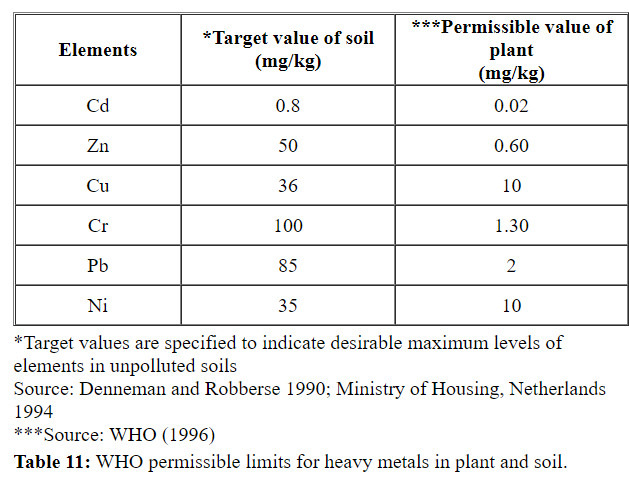

In [ ]:
from os import nice
with open('/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv', 'r') as read_obj:
    # pass the file object to DictReader() to get the DictReader object
    csv_dict_reader = DictReader(read_obj)
    df = pd.read_csv("/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv")
    # iterate over each line as a ordered dictionary
    for row in csv_dict_reader:
        #ORGANIC
        if(float(row['Cadmium'])>=0 and float(row['Cadmium'])<=0.6 and (float(row['Chromium'])>=0 and float(row['Chromium'])<=90 and (float(row['Copper'])>=0 and float(row['Copper'])<=30) and (float(row['Lead'])>=0 and float(row['Lead'])<=80) and (float(row['Nickel'])>=0 and float(row['Nickel']) <=30) and (float(row['Zinc'])>=0 and float(row['Zinc'])<=45))):
          i = int(row['S.no'])-1
          df.loc[i, 'Classification'] = 'Organic'
          df.to_csv("/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv", index=False)
        #avoid  Pesticides
        if(float(row['Cadmium'])>0.6 and float(row['Cadmium'])<=1 or (float(row['Chromium'])>91 and float(row['Chromium'])<=110 or (float(row['Copper'])>30 and float(row['Copper'])<=80) or (float(row['Lead'])>80 and float(row['Lead'])<=90) or (float(row['Nickel'])>30 and float(row['Nickel']) <=40) or (float(row['Zinc'])>45 and float(row['Zinc'])<=56))):
          i = int(row['S.no'])-1
          df.loc[i, 'Classification'] = 'Avoid Pesticide'
          df.to_csv("/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv", index=False)
        #not organic but fit for cultivation
        if(float(row['Cadmium'])>1 and float(row['Cadmium'])<=10 or (float(row['Chromium'])>110 and float(row['Chromium'])<=350 or (float(row['Copper'])>80 and float(row['Copper'])<=190) or (float(row['Lead'])>90 and float(row['Lead'])<=530) or (float(row['Nickel'])>40 and float(row['Nickel']) <=210) or (float(row['Zinc'])>56 and float(row['Zinc'])<=300))):
          i = int(row['S.no'])-1
          df.loc[i, 'Classification'] = 'Not Organic but fit for cultivation'
          df.to_csv("/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv", index=False)
        
        if(float(row['Cadmium'])>10 or (float(row['Chromium'])>350)  or (float(row['Copper'])>190)  or (float(row['Lead'])>530)  or (float(row['Nickel'])>210) or (float(row['Zinc'])>300)):
          i = int(row['S.no'])-1
          df.loc[i, 'Classification'] = 'Not fit for cultivation'
          df.to_csv("/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv", index=False)

In [ ]:
#display all classifications
with open('/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv', 'r') as read_obj:
    # pass the file object to DictReader() to get the DictReader object
    csv_dict_reader = DictReader(read_obj)
    
    # iterate over each line as a ordered dictionary
    for row in csv_dict_reader:
      print(row['S.no'],' : ',row['Classification'])

1  :  Not Organic but fit for cultivation
2  :  Not Organic but fit for cultivation
3  :  Organic
4  :  Organic
5  :  Avoid Pesticide
6  :  Organic
7  :  Organic
8  :  Organic
9  :  Organic
10  :  Not Organic but fit for cultivation
11  :  Not Organic but fit for cultivation
12  :  Not Organic but fit for cultivation
13  :  Not Organic but fit for cultivation
14  :  Organic
15  :  Avoid Pesticide
16  :  Not Organic but fit for cultivation
17  :  Not Organic but fit for cultivation
18  :  Not Organic but fit for cultivation
19  :  Not Organic but fit for cultivation
20  :  Not Organic but fit for cultivation
21  :  Organic
22  :  Not Organic but fit for cultivation
23  :  Not Organic but fit for cultivation
24  :  Organic
25  :  Organic
26  :  Organic
27  :  Organic
28  :  Not Organic but fit for cultivation
29  :  Not Organic but fit for cultivation
30  :  Not Organic but fit for cultivation
31  :  Organic
32  :  Organic
33  :  Not Organic but fit for cultivation
34  :  Not Organic but

<h1><font color="yellow">Data Visualization</font><h1>

In [ ]:
import numpy as np
from collections import Counter
from csv import reader

In [ ]:
with open('/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv', 'r') as read_obj:
    # pass the file object to DictReader() to get the DictReader object
     csv_dict_reader = DictReader(read_obj)
     c = Counter(row[7] for row in reader(read_obj))
     y = np.array([c['Organic'],c['Avoid Pesticide'],c['Not Organic but fit for cultivation'],c['Not fit for cultivation']])
     print(y)

[122  56 231  37]


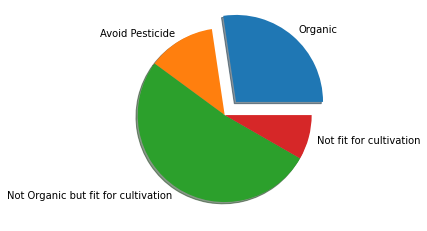

In [ ]:
import matplotlib.pyplot as plt



mylabels = ["Organic", "Avoid Pesticide", "Not Organic but fit for cultivation", "Not fit for cultivation"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

<h1><font color = "cyan">Classification<h1>

<h3>Split Test Train</h3>

In [ ]:
#split Test Train Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SoilToxicity/CS2007_SOIL_METALS.csv')
data.head()

,S.no,Cadmium,Chromium,Copper,Nickel,Lead,Zinc,Classification
0,1,0.330,21.10,18.20,18.10,21.8,80.3,Not Organic but fit for cultivation
1,2,0.332,22.90,16.40,18.20,23.3,91.3,Not Organic but fit for cultivation
2,3,0.057,9.16,3.69,4.04,10.8,19.4,Organic
3,4,0.026,11.60,0.62,4.21,10.7,19.8,Organic
4,5,0.468,16.60,36.40,5.87,31.0,19.4,Avoid Pesticide


In [ ]:
y = data['Classification']
X = data.drop(['Classification','S.no'],axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
print(y_test)

331                                Organic
373                        Avoid Pesticide
281    Not Organic but fit for cultivation
185                                Organic
284                        Avoid Pesticide
                      ...                 
385    Not Organic but fit for cultivation
127    Not Organic but fit for cultivation
354                                Organic
417                Not fit for cultivation
299                                Organic
Name: Classification, Length: 90, dtype: object


<h2>Decision tree<h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

[[13  1  0  0]
 [ 0 42  0  0]
 [ 0  0  7  0]
 [ 0  0  0 27]]


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, dtree_predictions,average='micro')
recall_score(y_test, dtree_predictions,average='micro')

0.9888888888888889

<h2>SVM<h2>

In [ ]:
from sklearn.svm import SVC

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.9222222222222223


<h2>Naive Bayes</h2>

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.8888888888888888


<h1>Pickle the model<h1>

In [ ]:
import pickle
# filename = 'SoilToxicCityModel.sav'
# pickle.dump(dtree_model, open(filename, 'wb'))
#load pickle model
loaded_model = pickle.load(open('/content/drive/MyDrive/SoilToxicity/SoilToxicCityModel.sav', 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)
test = [[0.6	,2.1	,1.2	,8.1	,2.8	,8.3]]

prediction = loaded_model.predict(test)
print(prediction)

['Avoid Pesticide']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


['Not Organic but fit for cultivation']
